# Python Visualization Basic
파이썬 데이터 시각화 정리하기.

## Rules
1. 공부하거나 참조한 곳 이력 남기기.
2. 이해한 내용으로 응용할 것.

## Basic Settings & libraries

In [1]:
# font - 한글
# 한글깨짐 방지 - 가장 먼저 실행 후 Restart and Run All
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# VSCode 에서 Python Env 확인하기.
# !pip3 list > etc/requirement.txt

In [8]:
# import libraries

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load files
from glob import glob
import sys

# regex
import re

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn import linear_model
from sklearn import datasets

# Display Expand
pd.set_option('display.max_columns', 200) # column / default=60
pd.set_option('display.max_rows', 200)
# pd.set_option('display.min_rows', 100) # row / default=10
pd.set_option('display.expand_frame_repr', True)

# Font Settings
# plt.rc('font', family='AppleGothic') # Mac 환경. # ref : https://pinkwink.kr/990
# in Google Colab # ref : http://corazzon.github.io/matplotlib_font_setting
# fm._get_fontconfig_fonts.cache_clear()
# plt.rcParams['font.family'] = 'NanumGothic' # plt 한글 폰트 적용 # NanumSquare, NanumGothic
# plt.rcParams['font.size'] = 16 # 기본 폰트 사이즈
# plt.rcParams['figure.figsize'] = (10, 8) # 기본 figure size

from matplotlib import font_manager, rc
# 한글 깨짐 import platform 이용
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()  # 맑음고딕
    rc('font', family=font_name)
else:
# Mac 인 경우
    rc('font', family='AppleGothic')  # 애플고딕


# 마이너스 폰트 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

## Matplotlib Basic

Computing regularization path using the LARS ... 한글 출력 예시
.

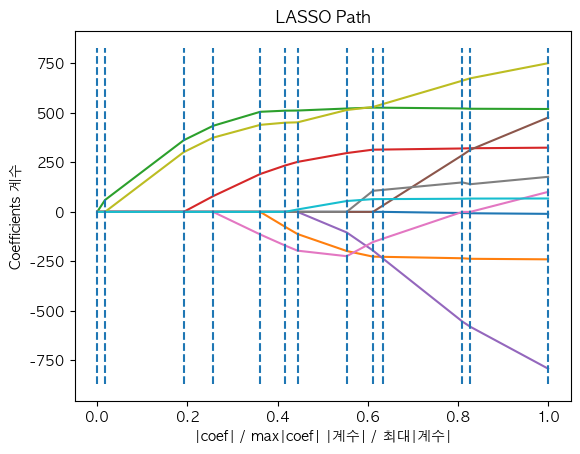

In [9]:
# 한글 깨지는 이슈 해결 중
# example plots
# code ref : https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html

X, y = datasets.load_diabetes(return_X_y=True)

print("Computing regularization path using the LARS ... 한글 출력 예시")
_, _, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef| |계수| / 최대|계수|")
plt.ylabel("Coefficients 계수")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

### BMI 지수 표 출력

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform  # 한글 깨짐 import platform 이용
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()  # 맑음고딕
    rc('font', family=font_name)
else:
# Mac 인 경우
    rc('font', family='AppleGothic')  # 애플고딕

# BMI 체크
def checkBMI(bmi):
    numlist = [18.5, 24.9, 29.9, 40.0, 40.1]
    typelist = ['저체중','정상체중','과체중','비만','고도비만']
    if 0 <= bmi <= numlist[0]:
        return typelist[0] # 저체중
    elif numlist[0] < bmi <= numlist[1]:
        return typelist[1] # 정상체중
    elif numlist[1] < bmi <= numlist[2]:
        return typelist[2] # 과체중
    elif numlist[2] < bmi <= numlist[3]:
        return typelist[3]
    elif numlist[4] <= bmi:
        return typelist[4]

# BMI 지수 표 그리기
def show_bmi():
    data = {'BMI': [18.5, 24.9, 25.0, 29.9, 30.0], '상태' : ['저체중', '정상체중', '과체중', '비만', '고도비만']}
    df = pd.DataFrame(data)

    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')

    # use the dataframe's values as celltext
    cellText = df.values
    colLabels = df.columns

    the_table = ax.table(cellText=cellText,colLabels=colLabels,rowLabels=None, cellLoc = 'center',loc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(14)
    the_table.scale(1, 1.5)

    for key, cell in the_table.get_celld().items():
        cell.set_linewidth(0)

    # Set the background color of each row
    colors = ['#686B73','#797D4C','#347C3A','#ECD3B7','#79312E','#3C413F']
    for i in range(len(cellText)+1):
        for j in range(len(data.keys())):
            the_table[i,j].set_facecolor(colors[i])
    plt.title('BMI 지수 표')
    plt.show()

def calBMI():
    print('BMI(체질량지수) 를 계산하기.')

    time.sleep(0.5)
    while True:
        try:
            weight = input('몸무게를 kg 단위로 소수점 2 이하로 입력하시오: ')
            height = input('키를 m 단위로 소수점 2 이하로 입력하시오: ')
            weight = float(weight)
            height = float(height)
            bmi = (weight**2)/weight
            print(f'입력하신 몸무게({weight})와 키({height})에 대한 BMI지수는 {bmi}입니다.\n이는 {checkBMI(bmi)} 상태에 해당됩니다. 자세한 사항은 아래의 표를 참조하세요.')
            show_bmi()
            break
        except:
            print('제대로 된 단위로 입력하시오. 처음으로 돌아갑니다.')
            time.sleep(0.2)

BMI(체질량지수) 를 계산하기.
입력하신 몸무게(65.5)와 키(166.2)에 대한 BMI지수는 65.5입니다.
이는 고도비만 상태에 해당됩니다. 자세한 사항은 아래의 표를 참조하세요.


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


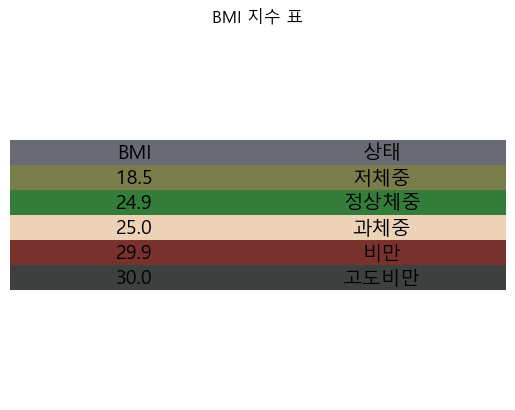

In [2]:
calBMI()